# Industrial-scale penicillin simulation - Data analysis

This project uses data from http://www.industrialpenicillinsimulation.com/. The data was generated using an advanced mathematical simulation of a 100,000 litre penicillin fermentation system referenced as IndPenSim. As they say: 

    'IndPenSim is the first simulation to include a realistic simulated Raman spectroscopy device for the purpose 
    of developing, evaluating and implementation of advanced and innovative control solutions applicable to 
    biotechnology facilities.'
This data contains 100 batches with all available process and Raman spectroscopy measurements. The 100 batches are controlled using different control strategies and different batch lengths representing a typical Biopharmaceutical manufacturing facility:

        Batches 1-30: Controlled by recipe driven approach
        Batches 31-60: Controlled by operators
        Batches 61:90: Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy
        Batches 91:100: Contain faults resulting in process deviations.

In [1]:
import pandas as pd
import numpy as np

In [2]:
%%capture
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
data_total = pd.read_csv(r"C:\Users\klime\Downloads\100_Batches_IndPenSim\Mendeley_data\100_Batches_IndPenSim_V3.csv")

In [5]:
data_total #all available data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [6]:
data_total.shape

(113935, 2239)

In [7]:
data_sum = pd.read_csv(r"C:\Users\klime\Downloads\100_Batches_IndPenSim\Mendeley_data\100_Batches_IndPenSim_Statistics.csv")

In [8]:
data_sum.head() #summary of data

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1,1066400.0,1720000.0,2786400.0,0
1,2,985910.0,1340100.0,2326000.0,0
2,3,1416100.0,1259200.0,2675300.0,0
3,4,815700.0,1071000.0,1886700.0,0
4,5,1128500.0,2434400.0,3562900.0,0


In [9]:
data_sum.shape

(100, 5)

We have looked at data and there is need to assign type of process controll according to Batch ref. For this purpose there is function process():

In [10]:
def process(row):
    if row['Batch ref'] <31:
        val = 'Recipes driven'
    elif row['Batch ref'] < 61 and row['Batch ref']>30:
        val = 'Operator driven'
    elif row['Batch ref'] < 91 and row['Batch ref']>60:
        val = 'Advanced'
    else:
        val = 'Process deviations'
    return val

In [11]:
data_sum['Process control'] = data_sum.apply(process, axis = 1)

In [12]:
data_sum.rename(columns={'Penicllin_yield_total (kg)':'Penicillin_yield_total (kg)'}, inplace=True)

In [13]:
data_sum.head()

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicillin_yield_total (kg),Fault ref(0-NoFault 1-Fault),Process control
0,1,1066400.0,1720000.0,2786400.0,0,Recipes driven
1,2,985910.0,1340100.0,2326000.0,0,Recipes driven
2,3,1416100.0,1259200.0,2675300.0,0,Recipes driven
3,4,815700.0,1071000.0,1886700.0,0,Recipes driven
4,5,1128500.0,2434400.0,3562900.0,0,Recipes driven


In [14]:
list(data_total)

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

Splitting the data into process measurement data and Raman spectroscopy data.

In [15]:
variable_raman_data = np.split(data_total, [data_total.columns.get_loc("2400")], axis=1)
variable_data = variable_raman_data[0]
variable_data.describe()
### Reable Batch ID's correctly
variable_data = variable_data.rename(columns={'2-PAT control(PAT_ref:PAT ref)': 'Batch reference(Batch_ref:Batch ref)','Batch reference(Batch_ref:Batch ref)':'2-PAT control(PAT_ref:PAT ref)'})
raman_spectra = variable_raman_data[1]
batch_ref_df = variable_data[['Batch reference(Batch_ref:Batch ref)']]
raman_spectra_batch_id = pd.concat([batch_ref_df, raman_spectra], axis=1)
variable_data.shape
variable_data.head(3)
variable_data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154,89307.003616,89402.127915
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534,47765.751082,47852.683115
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000,47016.500000,47029.500000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000,89699.000000,89772.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000,129390.000000,129570.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,0.0,117.930000,1.000000,1.000000,2.000000,100.000000,100.000000,1.000000,194630.000000,195340.000000


In [16]:
variable_list = variable_data.columns

Text(0, 0.5, 'Penicillin concentration(P:g/L)')

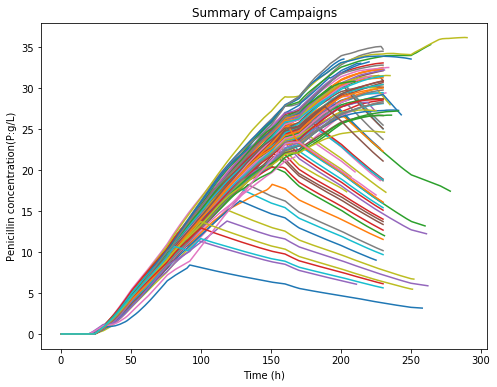

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
bp = variable_data.groupby('Batch reference(Batch_ref:Batch ref)').plot(x = 'Time (h)', y = 'Penicillin concentration(P:g/L)',   ax=ax, legend = False, )
ax.set_title('Summary of Campaigns')
ax.set_xlabel('Time (h)')
ax.set_ylabel('Penicillin concentration(P:g/L)')

Dependence of Penicilin concentrations on time in individual batches. It is confusing and there is no value in this graph. The data need to be clean up first.

I am defining function process2() (because it is similar as function process) which match individual batches with numerical value based on type of process controll.

In [18]:
def process2(row):
    if row['Batch reference(Batch_ref:Batch ref)'] <31:
        val = '1'
    elif row['Batch reference(Batch_ref:Batch ref)'] < 61 and row['Batch reference(Batch_ref:Batch ref)']>30:
        val = '2'
    elif row['Batch reference(Batch_ref:Batch ref)'] < 91 and row['Batch reference(Batch_ref:Batch ref)']>60:
        val = '3'
    else:
        val = '4'
    return val

In [19]:
variable_data['Process control'] = variable_data.apply(process2, axis = 1)

And here comes interesting part. I am defining function MakeChart() which would compress that 100 batches into just 4, one for each type of process controll.

In [20]:
def MakeChart(variable):
    selected = variable_data[['Time (h)',variable,'Process control']]    #Selecting variables needed for chart
    time_series_list = selected.values.tolist()                          #Transforming from dataframe to list
    recipe=[]                                                            #Sublists with types of Process control
    operators=[]
    advanced=[]
    deviations=[]
    i=0
    while i<len(time_series_list):                                       #Sorting to sublists based on Process control
        if time_series_list[i][2]=='1':
            recipe.append(time_series_list[i])
        elif time_series_list[i][2]=='2':
            operators.append(time_series_list[i])
        elif time_series_list[i][2]=='3':
            advanced.append(time_series_list[i])
        else:
            deviations.append(time_series_list[i])
        i +=1
    
    df_recipe = pd.DataFrame(recipe)                                     #From sublists to subdataframes
    df_operators = pd.DataFrame(operators)
    df_advanced = pd.DataFrame(advanced)
    df_deviations = pd.DataFrame(deviations)
    del df_recipe[2]                                                     #Cleaning subdataframes
    del df_operators[2]
    del df_advanced[2]
    del df_deviations[2]
    recipe_avg = df_recipe.groupby(0).mean()                             #Averaging values
    recipe_avg.rename(columns={1:'Recipes driven'}, inplace=True)
    operators_avg = df_operators.groupby(0).mean()
    operators_avg.rename(columns={1:'operators driven'}, inplace=True)
    advanced_avg = df_advanced.groupby(0).mean()
    advanced_avg.rename(columns={1:'Advanced solution'}, inplace=True)
    deviations_avg = df_deviations.groupby(0).mean()
    deviations_avg.rename(columns={1:'Process deviations'}, inplace=True)
    dff = recipe_avg[['Recipes driven']]                                 #From subdataframes to one dataframe
    dff['Operators driven'] = operators_avg
    dff['Advanced solution'] = advanced_avg
    dff['Process deviations'] = deviations_avg
    df = dff.head(1205)                                                   
    df['Time (h)'] = df.index
    df = df.reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8,6))                                #Making chart
    jk=df.plot(x= 'Time (h)', y = ['Recipes driven', 'Operators driven', 'Advanced solution', 'Process deviations'], ax=ax, legend=True)
    ax.set_title(variable+'/ Time(h)')
    ax.set_ylabel(variable)

C:\Users\klime\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


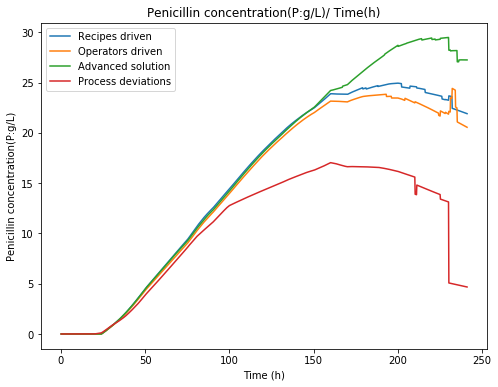

In [21]:
MakeChart('Penicillin concentration(P:g/L)')

Yes, that´s clearer now. We can see that advanced process controll have highest yield of Penicillin. 

C:\Users\klime\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


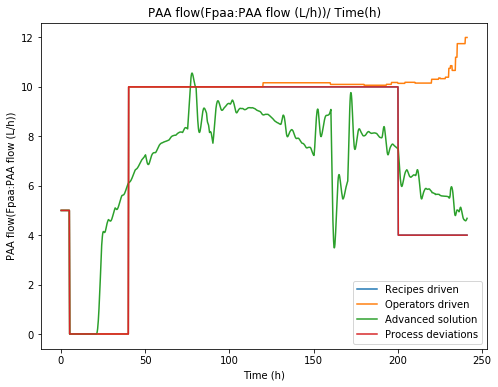

In [22]:
MakeChart('PAA flow(Fpaa:PAA flow (L/h))')

Advanced solution uses precise dosing of phenylacetic acid (PAA) based on actual need. 

Question is:
Has Advanced solution significantly better yield than other types of process control?

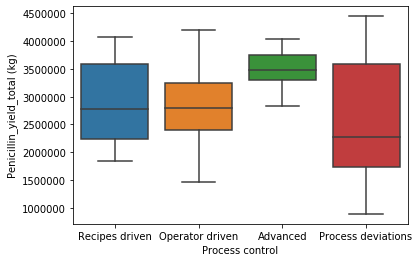

In [23]:
sns.boxplot(x = 'Process control', y = 'Penicillin_yield_total (kg)', data = data_sum)


Advanced solution has highest value of median Penicillin yield. But performs significantly better than other?

In [24]:
import researchpy as rp
rp.summary_cont(data_sum['Penicillin_yield_total (kg)']. groupby(data_sum['Process control']))

,N,Mean,SD,SE,95% Conf.,Interval
Process control,,,,,,
Advanced,30,3.484283e+06,3.079801e+05,56229.217480,3.372190e+06,3.596377e+06
Operator driven,30,2.833113e+06,6.799292e+05,124137.527529,2.585644e+06,3.080582e+06
Process deviations,10,2.600203e+06,1.199611e+06,379350.210474,1.816457e+06,3.383949e+06
Recipes driven,30,2.912750e+06,7.675764e+05,140139.644456,2.633381e+06,3.192119e+06


In [25]:
import scipy.stats as stats
stats.f_oneway(data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Advanced'],
               data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Operator driven'],
               data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Recipes driven'],
               data_sum['Penicillin_yield_total (kg)'][data_sum['Process control']=='Process deviations'])

F_onewayResult(statistic=6.659558242061837, pvalue=0.00039204294070446273)

P value is less than 0.05 therefore we can reject null hypothesis that all types of process control have same impact on yield of Penicillin. And we can say that Advanced process control performs significantly better than other.
